In [32]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


In [9]:
dados = pd.read_csv('C:/Users/raque/OneDrive/Documentos/Python/Análise Exploratória de Dados/Trabalho Final/pbaed_ex4.csv')
print(dados)

         A      B      C      D
0    146.2  147.2  146.6  146.8
1    146.8  146.9  146.8  146.8
2    147.4  147.5  147.1  147.3
3    146.6  147.1  147.4  147.2
4    147.3  146.9  147.6  147.4
..     ...    ...    ...    ...
139  146.6  145.9  146.0  146.5
140  146.0  146.4  145.9  146.4
141  146.6  146.6  146.4  146.2
142  146.2  146.8  146.7  146.7
143  146.8  147.3  147.0  146.7

[144 rows x 4 columns]


In [27]:
# centrar dados
centdados = (dados.mean() - dados)/dados.std()
print(centdados)


            A         B         C         D
0   -0.390827 -1.358675 -0.508693 -0.769105
1   -1.045236 -1.043281 -0.735128 -0.769105
2   -1.699644 -1.674069 -1.074781 -1.316295
3   -0.827100 -1.253544 -1.414434 -1.206857
4   -1.590576 -1.043281 -1.640869 -1.425733
..        ...       ...       ...       ...
139 -0.827100  0.008031  0.170613 -0.440792
140 -0.172691 -0.517625  0.283830 -0.331354
141 -0.827100 -0.727888 -0.282258 -0.112478
142 -0.390827 -0.938150 -0.621911 -0.659668
143 -1.045236 -1.463806 -0.961563 -0.659668

[144 rows x 4 columns]


In [22]:
# matriz de covariâncias dos dados padronizados
centmatriz = centdados.cov()
print(round(centmatriz,2))

      A     B     C     D
A  1.00  0.86  0.55  0.60
B  0.86  1.00  0.59  0.64
C  0.55  0.59  1.00  0.88
D  0.60  0.64  0.88  1.00


In [28]:
# valores próprios da matriz de covariâncias acima
[eigval, eigvec] = LA.eig(centmatriz)
idx = eigval.argsort()[::-1] # ordena maior para menor
eigval = eigval[idx]
eigvec = eigvec[:,idx]

print(f"Valores próprios da matriz de covariâncias:\n{eigval}\n")
print(f"Vetores próprios associados a cada valor próprio:\n{eigvec}\n")

Valores próprios da matriz de covariâncias:
[3.06107159 0.68195288 0.14380797 0.11316756]

Vetores próprios associados a cada valor próprio:
[[-0.49116408 -0.53238189 -0.68703083  0.05758477]
 [-0.50295476 -0.46988715  0.71206931 -0.13856361]
 [-0.49414193  0.54115313 -0.12217877 -0.66936492]
 [-0.51148617  0.45047628  0.0775776   0.72762265]]



Percentagens: 
76.53%
17.05%
3.60%
2.83%


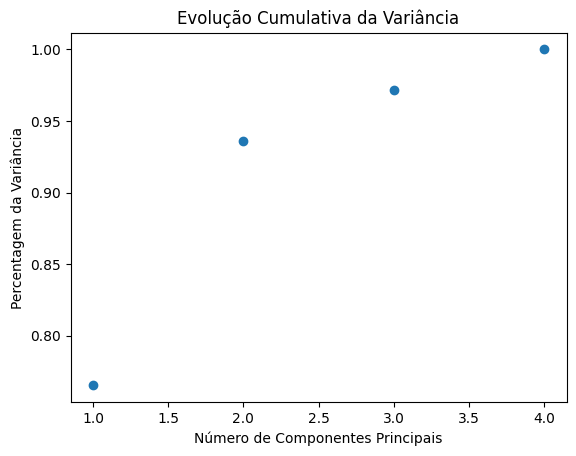

In [36]:
# representação gráfica a evolução cumulativa da percentagem da variância
somavaloresproprios = 3.06107159 + 0.68195288 + 0.14380797 + 0.11316756
perc1 = 3.06107159/somavaloresproprios
perc2 = 0.68195288/somavaloresproprios
perc3 = 0.14380797/somavaloresproprios
perc4 = 0.11316756/somavaloresproprios

print(f"Percentagens: \n{perc1:.2%}\n{perc2:.2%}\n{perc3:.2%}\n{perc4:.2%}")

propacum = np.cumsum(eigval) / np.sum(eigval)

plt.scatter(range(1, len(propacum) + 1), propacum, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Percentagem da Variância')
plt.title('Evolução Cumulativa da Variância')
plt.show()

In [37]:
# quantos componentes principais precisa para garantir pelo menos 90% de variância
"""Podem ser 2, 3, 10, 100, 500 valores próprios dependendo do tamanho dos nossos dados."""

propacum = np.cumsum(eigval) / np.sum(eigval)
numcomp = np.argmax(propacum >= 0.9) + 1

print(f"Número de componentes para 90% de variância explicada: {numcomp}")


Número de componentes para 90% de variância explicada: 2


In [42]:
# quais vetores indicados escolheria
maioresVet = eigvec[:, :2]
print(maioresVet)

[[-0.49116408 -0.53238189]
 [-0.50295476 -0.46988715]
 [-0.49414193  0.54115313]
 [-0.51148617  0.45047628]]
